In [15]:
import pandas as pd
import matplotlib.pyplot as plt 

SPOTIFY_GREEN = "#1DB954"


# Specify the file path of the CSV file
file_path = "~/Desktop/my_audio_history.csv"

# Read the CSV file into a dataframe
df = pd.read_csv(file_path)

# Display the column names
df.columns

Index(['id', 'shuffle_state', 'repeat_state', 'timestamp', 'progress_ms',
       'currently_playing_type', 'is_playing', 'device_id', 'device_is_active',
       'device_is_private_session', 'device_is_restricted', 'device_name',
       'device_type', 'device_volume_percent', 'context_type', 'context_uri',
       'item_album_name', 'item_album_uri', 'item_artists_name',
       'item_artists_uri', 'item_duration_ms', 'item_explicit',
       'item_is_local', 'item_name', 'item_popularity', 'item_track_number',
       'item_uri', 'id.1', 'danceability', 'energy', 'track_key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'uri', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
# Convert the 'timestamp' column to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

## Minutes per month

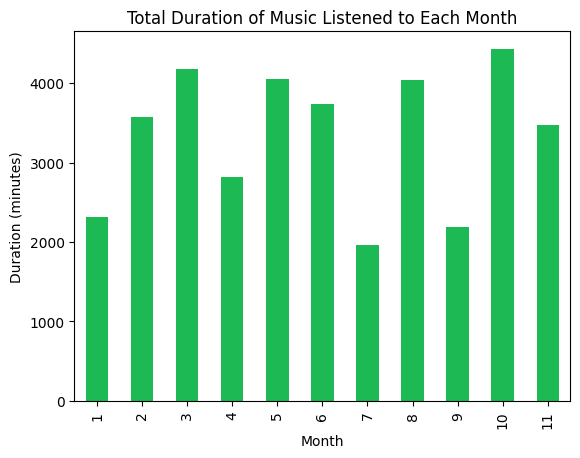

In [25]:
# Convert the 'datetime' column to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a new column 'month' to store the month of each datetime
df['month'] = df['datetime'].dt.month

# Group the dataframe by 'month' and calculate the sum of 'duration_ms' for each month
monthly_duration = df.groupby('month')['duration_ms'].sum()

# Convert the duration from milliseconds to minutes
monthly_duration = monthly_duration / 60000

monthly_duration.plot(x='month', y='duration_ms', kind='bar', color=SPOTIFY_GREEN)
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.title('Total Duration of Music Listened to Each Month')
plt.show()

## Top three tracks per month 

In [48]:
# Group the dataframe by 'month' and 'track_name', and count the occurrences of each track name
top_tracks = df.groupby(['month', 'item_name', 'item_artists_name', 'danceability', 'energy', 
  'track_key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
  'liveness', 'valence', 'tempo']).size().reset_index(name='count')

# Sort the dataframe by 'month' and 'count' in descending order
top_tracks_sorted = top_tracks.sort_values(['month', 'count'], ascending=[True, False])

# Group the sorted dataframe by 'month' and select the top three track names for each month
top_three_tracks = top_tracks_sorted.groupby('month').head(3)

# Group the top three tracks by month
top_three_tracks_grouped = top_three_tracks.groupby('month')

# Create a new dataframe to store the top three tracks for each month
top_three_tracks_df = pd.DataFrame(columns=[
  'month', 'item_name', 'item_artists_name', 'count', 'danceability', 'energy', 
  'track_key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
  'liveness', 'valence', 'tempo'])

# Iterate through each group in the grouped dataframe
for group in top_three_tracks_grouped.groups:
  # Get the top three tracks for the current month
  top_three_tracks_month = top_three_tracks_grouped.get_group(group)
  # Concatenate the top three tracks to the new dataframe
  top_three_tracks_df = pd.concat([top_three_tracks_df, top_three_tracks_month])

top_three_tracks_df

/var/folders/_7/xd1n2fbs63vc7db1_r3n23zr0000gn/T/ipykernel_24569/1196442220.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_three_tracks_df = pd.concat([top_three_tracks_df, top_three_tracks_month])


,month,item_name,item_artists_name,count,danceability,energy,track_key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
315,1,True Blue,boygenius,19,0.464,0.774,7.0,-7.761,1.0,0.0406,0.253000,0.003770,0.1810,0.4190,146.202
209,1,No L's,Smino,16,0.786,0.650,1.0,-6.472,1.0,0.3100,0.156000,0.000000,0.1270,0.4920,130.993
288,1,Stick,Snail Mail,11,0.534,0.548,3.0,-5.851,1.0,0.0288,0.037700,0.000035,0.0670,0.3120,117.904
381,2,Basketball Shoes,"Black Country, New Road",21,0.283,0.451,7.0,-8.585,1.0,0.0452,0.020300,0.003180,0.0463,0.0683,91.116
463,2,Good Will Hunting,"Black Country, New Road",20,0.587,0.358,2.0,-9.194,1.0,0.0276,0.219000,0.002010,0.1920,0.3680,96.685
651,2,The Place Where He Inserted the Blade,"Black Country, New Road",20,0.376,0.451,11.0,-8.276,1.0,0.0327,0.402000,0.000041,0.1280,0.1640,123.344
935,3,Mariella,Khruangbin,20,0.593,0.576,2.0,-10.331,1.0,0.0320,0.526000,0.718000,0.0827,0.5590,109.935
968,3,Not Strong Enough,boygenius,19,0.502,0.800,1.0,-5.853,1.0,0.0402,0.002740,0.000003,0.0910,0.3090,127.001
1053,3,Speaking Terms,Snail Mail,17,0.562,0.711,4.0,-7.033,1.0,0.0271,0.076600,0.350000,0.1170,0.4110,124.887
1457,4,Old Friends,Pinegrove,15,0.492,0.555,4.0,-7.315,1.0,0.0397,0.410000,0.000000,0.4940,0.3750,147.361
